<a href="https://colab.research.google.com/github/GFour11/DS_HW10/blob/main/MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [5]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

T-shirt
trousers
sweater
dress
jacket
sandals
blouse
sneakers
bag
boots


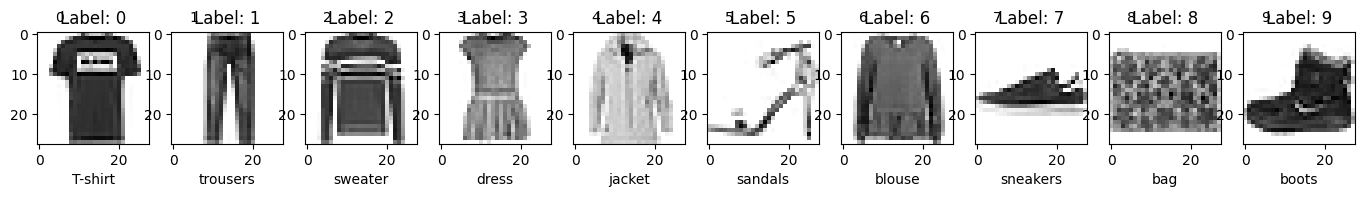

In [6]:
import numpy as np
labels = ['T-shirt', 'trousers', 'sweater', 'dress', 'jacket', 'sandals', 'blouse', 'sneakers', 'bag', 'boots']
plt.figure(figsize=(17, 5))
unique_labels = np.unique(train_y)
unique_labels = unique_labels.astype(np.uint8)

for i, label in enumerate(unique_labels):
    index = np.where(train_y == label)[0][0]

    plt.subplot(1, len(unique_labels), i + 1)
    plt.imshow(train_x[index], cmap='binary')
    plt.xlabel(labels[label])
    print(labels[label])
    plt.title(f'Label: {label}')
    plt.text(x=4, y=-3, s=i)
plt.show()

In [7]:
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [8]:
from keras import layers
from keras import models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [10]:
model.fit(train_x, train_y, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 13s 6ms/step - loss: 0.6600 - accuracy: 0.7535
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3769 - accuracy: 0.8633
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3141 - accuracy: 0.8850
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2799 - accuracy: 0.8976
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2544 - accuracy: 0.9066
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2337 - accuracy: 0.9141
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2163 - accuracy: 0.9202
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2007 - accuracy: 0.9259
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1876 - accuracy: 0.9308
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1743 - accuracy: 0.934

In [11]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2585 - accuracy: 0.9075
Test accuracy: 0.9075000286102295


1/1 [==============================] - 0s 158ms/step


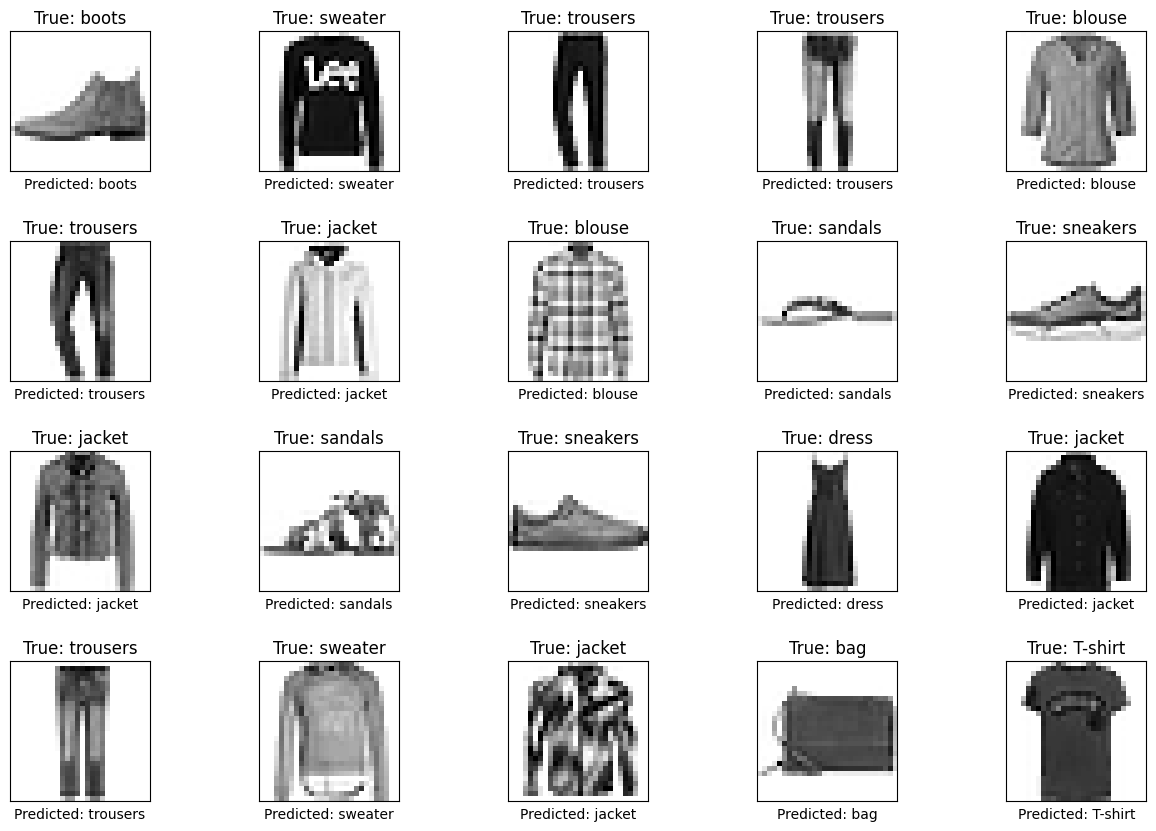

In [12]:
predictions = model.predict(test_x[:20])

plt.figure(figsize=(15, 10))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_x[i], cmap='binary')
    plt.title(f'True: {labels[np.argmax(test_y[i])]}')
    plt.xlabel(f"Predicted: {labels[np.argmax(predictions[i])]}")
    plt.xticks([])
    plt.yticks([])


plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

Використовуючи згорутку на "базових" параметрах вдалось досягнути результату в 91% точності, і 100% результат на виборці в 20 елементів.

Далі перейдемо до другої частини

In [13]:
! pip install tensorflow

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Flatten
from keras.layers import Dropout

In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [16]:

def preprocess_images(images):
    images = np.stack((images,) * 3, axis=-1)
    images = images.astype("float32") / 255.0
    return images


x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)


x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

In [17]:
from keras.applications import VGG16
from tensorflow.keras.models import Sequential
vgg = VGG16(weights="imagenet",
        include_top=False,
        input_tensor=layers.Input(shape=(32, 32, 3)),)
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation="softmax"))

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                       

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [19]:
history = model.fit(
        x_train,
        y_train,
        epochs=10,
        steps_per_epoch=60,
        validation_data=(x_test, y_test),
    )

Epoch 1/10
60/60 [==============================] - 48s 341ms/step - loss: 1.8304 - accuracy: 0.2864 - val_loss: 1.1682 - val_accuracy: 0.5273
Epoch 2/10
60/60 [==============================] - 20s 332ms/step - loss: 0.8417 - accuracy: 0.6767 - val_loss: 0.5713 - val_accuracy: 0.7739
Epoch 3/10
60/60 [==============================] - 20s 337ms/step - loss: 0.5511 - accuracy: 0.7926 - val_loss: 0.4302 - val_accuracy: 0.8456
Epoch 4/10
60/60 [==============================] - 20s 341ms/step - loss: 0.4084 - accuracy: 0.8578 - val_loss: 0.3383 - val_accuracy: 0.8833
Epoch 5/10
60/60 [==============================] - 20s 337ms/step - loss: 0.3363 - accuracy: 0.8861 - val_loss: 0.2880 - val_accuracy: 0.8983
Epoch 6/10
60/60 [==============================] - 20s 335ms/step - loss: 0.2772 - accuracy: 0.9072 - val_loss: 0.2691 - val_accuracy: 0.9081
Epoch 7/10
60/60 [==============================] - 20s 338ms/step - loss: 0.2550 - accuracy: 0.9134 - val_loss: 0.2337 - val_accuracy: 0.9169

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 8ms/step - loss: 0.2257 - accuracy: 0.9216
Test accuracy: 0.9215999841690063


1/1 [==============================] - 0s 411ms/step


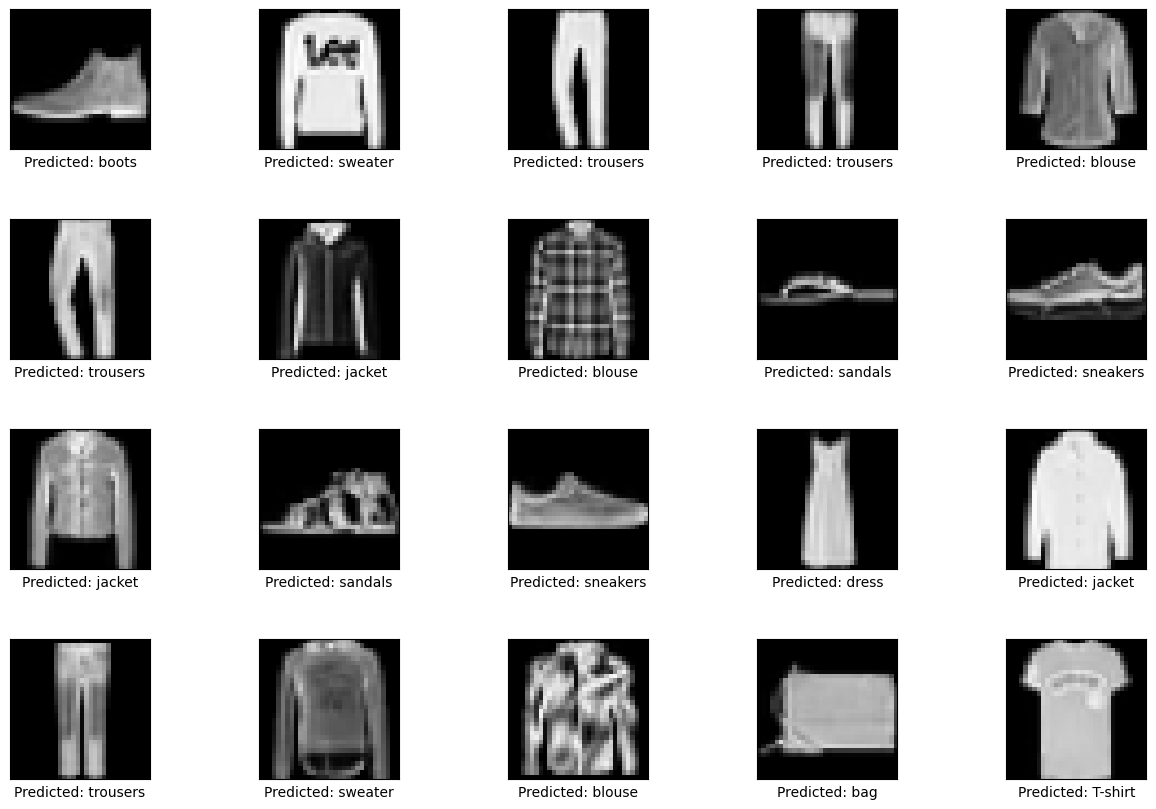

In [21]:
predictions = model.predict(x_test[:20])

plt.figure(figsize=(15, 10))
labels = ['T-shirt', 'trousers', 'sweater', 'dress', 'jacket', 'sandals', 'blouse', 'sneakers', 'bag', 'boots']
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i], cmap='binary')
    plt.xlabel(f"Predicted: {labels[np.argmax(predictions[i])]}")
    plt.xticks([])
    plt.yticks([])


plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

**СПРОБУЄМО ДОНАВЧИТИ МОДЕЛЬ**

In [22]:
(x2_train, y2_train), (x2_test, y2_test) = fashion_mnist.load_data()

def preprocess_images(images):
    images = np.stack((images,) * 3, axis=-1)
    images = images.astype("float32") / 255.0
    return images


x2_train = preprocess_images(x2_train)
x2_test = preprocess_images(x2_test)


x2_train = tf.image.resize(x2_train, (32, 32))
x2_test = tf.image.resize(x2_test, (32, 32))

In [34]:
from keras.applications import VGG16
from tensorflow.keras.models import Sequential
vgg = VGG16(weights="imagenet",
        include_top=False,
        input_tensor=layers.Input(shape=(32, 32, 3)),)

set_trainable = False
for layer in vgg.layers:
    if layer.name == "block3_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)               

In [35]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [36]:
history = model.fit(
        x2_train,
        y2_train,
        epochs=30,
        steps_per_epoch=60,
        validation_data=(x2_test, y2_test),
    )

Epoch 1/30
60/60 [==============================] - 18s 253ms/step - loss: 1.9853 - accuracy: 0.2024 - val_loss: 1.3188 - val_accuracy: 0.3911
Epoch 2/30
60/60 [==============================] - 15s 248ms/step - loss: 1.2045 - accuracy: 0.4869 - val_loss: 0.9582 - val_accuracy: 0.5604
Epoch 3/30
60/60 [==============================] - 15s 251ms/step - loss: 0.7535 - accuracy: 0.7031 - val_loss: 0.4947 - val_accuracy: 0.8264
Epoch 4/30
60/60 [==============================] - 15s 255ms/step - loss: 0.4647 - accuracy: 0.8485 - val_loss: 0.3922 - val_accuracy: 0.8672
Epoch 5/30
60/60 [==============================] - 15s 252ms/step - loss: 0.3601 - accuracy: 0.8833 - val_loss: 0.3097 - val_accuracy: 0.8953
Epoch 6/30
60/60 [==============================] - 15s 248ms/step - loss: 0.3068 - accuracy: 0.8998 - val_loss: 0.2901 - val_accuracy: 0.9023
Epoch 7/30
60/60 [==============================] - 15s 250ms/step - loss: 0.2714 - accuracy: 0.9098 - val_loss: 0.2701 - val_accuracy: 0.9091

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.3411 - accuracy: 0.9266
Test accuracy: 0.9265999794006348


1/1 [==============================] - 0s 147ms/step


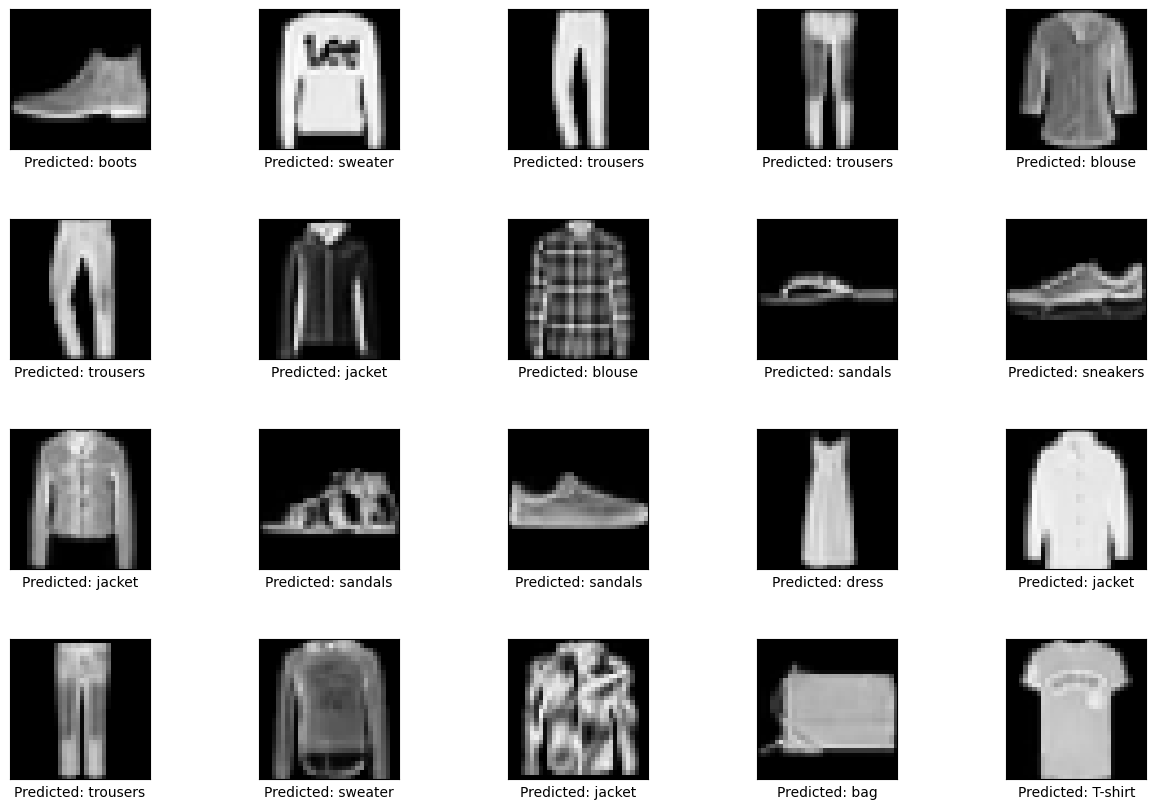

In [38]:
predictions = model.predict(x_test[:20])

plt.figure(figsize=(15, 10))
labels = ['T-shirt', 'trousers', 'sweater', 'dress', 'jacket', 'sandals', 'blouse', 'sneakers', 'bag', 'boots']
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i], cmap='binary')
    plt.xlabel(f"Predicted: {labels[np.argmax(predictions[i])]}")
    plt.xticks([])
    plt.yticks([])


plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

Використання VGG16 поліпшило роботу нейронної мережі, а донавчання ще більше збільшило відсоток, хоч і незначуще. Фінальний результат точності склав майже 93%